# Overview of observational constraints on BH natal kicks

In [4]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter


home_dir = os.path.expanduser("~") 
proj_dir = home_dir + "/Documents/Projects/Winds2"
bse_grid_loc = proj_dir + "/code/GridSubmitCOMPAS/masterfolder/"
datar_root = home_dir + "/ceph/CompasOutput/v02.35.02/"
sim_name = 'DiscreteMetallicities_noBHkick'# 'DiscreteMetallicities'#'

######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,20,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=SMALL_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize



In [5]:

# The BH kick review data is in an Excel file
BH_kick_data = pd.read_excel(proj_dir + "/BHkickReview/BH_kick_reviw.xlsx", sheet_name="Sheet1")

# Display the first few rows of the DataFrame
print(BH_kick_data.head())

          sys_name  m_bh_min  m_bh_med  m_bh_max  v_kick_min  v_kick_med  \
0         VFTS 243       8.0      10.1      12.1           0         5.0   
1          Cyg X-1      18.8      21.0      23.2           0        10.0   
2     GRO J1655-40       5.6       6.0       6.4          45        80.0   
3    XTE J1188+480       6.0       8.0      10.0          80       195.0   
4  MAXI J1305-704        7.9       8.9      10.5          79        91.0   

   v_kick_max        method  uplims                                  citation  \
0          10  spectroscopy    True     2022NatAs...6.1085S, arXiv:2310.01509   
1          20           XRB    True                       2021Sci...371.1046M   
2         115           XRB   False  2016A&A...587A..61C, 2005ApJ...625..324W   
3         310           XRB   False                       2009ApJ...697.1057F   
4         114           XRB   False  2021MNRAS.506..581M, 2023ApJ...952L..34K   

                                       citation link  
0

/var/folders/mc/hhcvbs7n2jq7d_hr2d6qvjhm0000gq/T/ipykernel_21380/665952297.py:56: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from current font.
  plt.savefig(proj_dir + "/plots/BH_kick_review.pdf", bbox_inches = 'tight')
/var/folders/mc/hhcvbs7n2jq7d_hr2d6qvjhm0000gq/T/ipykernel_21380/665952297.py:56: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from current font.
  plt.savefig(proj_dir + "/plots/BH_kick_review.pdf", bbox_inches = 'tight')
/Users/lvanson/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


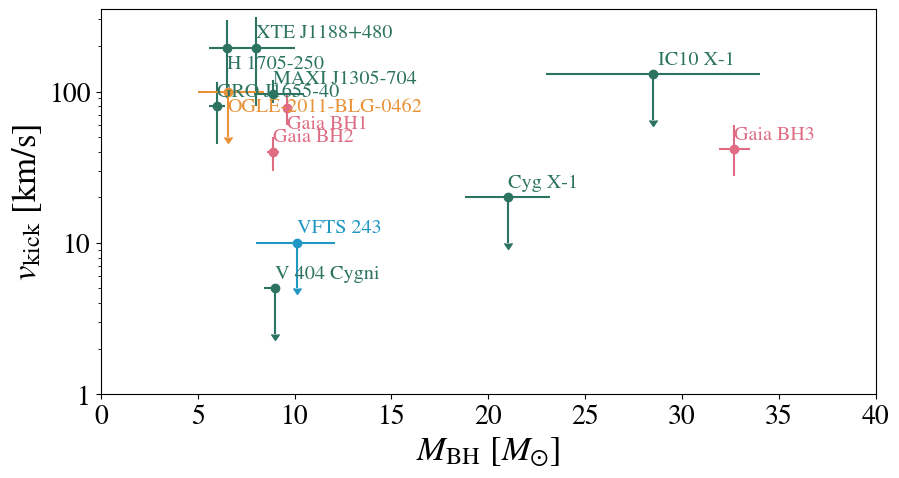

In [6]:
color_dict = {"spectroscopy": "#2197c4",#"#2F70AF",
    "XRB": "#2c7360",#'#A587CA',#
    "microlensing": '#e89338',#"#386cff",
    "astrometry": "#df6c83",#"#677d2c"
}
# This is necessary because the pandas tables are stupid
colors = [color_dict[method] if method in color_dict else 'black' for method in BH_kick_data['method']]

##################################################
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

##################################################


##################################################
# Annotate each point with the system name
for i, sys_name in enumerate(BH_kick_data['sys_name']):
    VA, dy = 'bottom', 1.1 # vertial alignment for the annotation

    m_bh_err = np.array([[BH_kick_data['m_bh_med'][i] - BH_kick_data['m_bh_min'][i]], 
                         [BH_kick_data['m_bh_max'][i] - BH_kick_data['m_bh_med'][i]]])
    
    # Upper lim
    if BH_kick_data['uplims'].iloc[i]:
        v_kick_err = BH_kick_data['v_kick_max'][i]/2 #np.array([[BH_kick_data['v_kick_max'][i] - BH_kick_data['v_kick_min'][i]], [0]])
        y_value = BH_kick_data['v_kick_max'][i]
    # Data is a range
    else:
        v_kick_mid = (BH_kick_data['v_kick_min'][i] + BH_kick_data['v_kick_max'][i]) / 2

        v_kick_err = np.array([[BH_kick_data['v_kick_med'][i] - BH_kick_data['v_kick_min'][i]], 
                                         [BH_kick_data['v_kick_max'][i] - BH_kick_data['v_kick_med'][i]]])    
        y_value = v_kick_mid

    # Plot it
    plt.errorbar(BH_kick_data['m_bh_med'][i], y_value, fmt = 'o', c = colors[i],
                xerr=m_bh_err, yerr=v_kick_err, uplims = BH_kick_data['uplims'][i])
    
    # Annotate
    if sys_name in ['Gaia BH1', 'H 1705-250','OGLE-2011-BLG-0462']:
        VA, dy = 'top', 0.9

    plt.annotate(sys_name, (BH_kick_data['m_bh_med'][i], y_value *dy), ha = 'left', 
                 va = VA, c = colors[i], size = 14.5)


# Plotvalues
plt.xlabel(r'$M_{\rm BH}$ [$M_{\odot}$]', fontsize = 25)
plt.ylabel(r'$v_{\rm kick}$ [km/s]', fontsize = 25)
plt.xlim(0, 40)
plt.ylim(1, 350)
plt.yscale('log')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

plt.savefig(proj_dir + "/plots/BH_kick_review.pdf", bbox_inches = 'tight')
plt.show()




/Users/lvanson/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


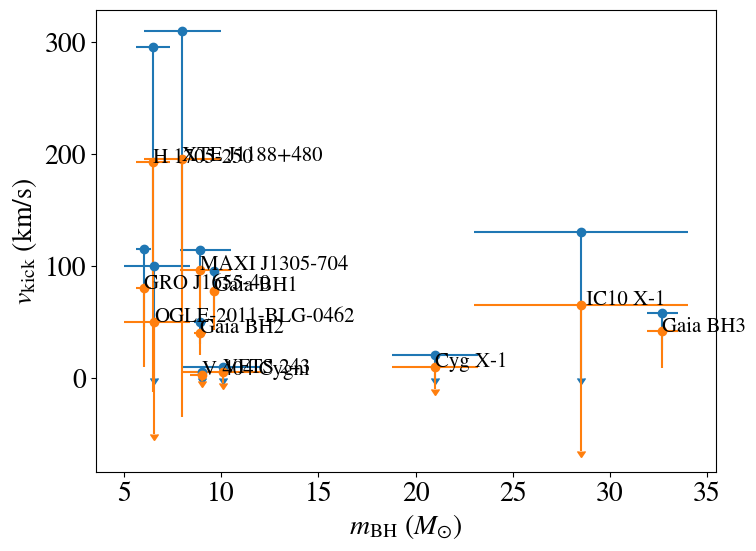

In [7]:

fig, ax = plt.subplots(1, 1, figsize=(8, 6))


# Calculate the errors for m_bh and v_kick
m_bh_err = np.array([BH_kick_data['m_bh_med'] - BH_kick_data['m_bh_min'], 
                     BH_kick_data['m_bh_max'] - BH_kick_data['m_bh_med']])


##############################
# Plot those that are upper limits
v_kick_err = np.array([BH_kick_data['v_kick_max'] - BH_kick_data['v_kick_min'], 
                       np.full(len(BH_kick_data), 0.0)])

plt.errorbar(BH_kick_data['m_bh_med'], BH_kick_data['v_kick_max'], fmt = 'o', 
             xerr=m_bh_err, yerr=v_kick_err, uplims=BH_kick_data['uplims'])


##############################
# Plot those that are a range

# Calculate the midpoints of v_kick
v_kick_mid = (BH_kick_data['v_kick_min'] + BH_kick_data['v_kick_max']) / 2

plt.errorbar(BH_kick_data['m_bh_med'],v_kick_mid, fmt = 'o', 
             xerr=m_bh_err, yerr=v_kick_err, uplims=BH_kick_data['uplims'])


# Annotate each point with the system name
for i, sys_name in enumerate(BH_kick_data['sys_name']):
    ax.annotate(sys_name, (BH_kick_data['m_bh_med'].iloc[i], v_kick_mid.iloc[i]), size = 15)


# Display the plot
plt.xlabel(r'$m_{\rm BH}$ ($M_{\odot}$)')
plt.ylabel(r'$v_{\rm kick}$ (km/s)')
# plt.yscale('log')
# plt.ylim(1e-1, 5e2)
plt.show()